<a href="https://colab.research.google.com/github/ArshaHaridas/Data-Science-lab/blob/main/dnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
mnistDB=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))


In [4]:
y_train=y_train.astype('float32')/255
y_test=y_test.astype('float32')/255
ML=keras.models.Sequential()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 70)                7070      
                                                                 
 dense_3 (Dense)             (None, 10)                710       
                                                                 
 dense_4 (Dense)             (None, 50)                550       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 70)                7

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


digit is  [9.9999738e-01 4.4212061e-07 5.1158167e-07 3.1098114e-07 1.3035900e-07
 4.3166352e-07 1.3431182e-07 1.5259171e-07 1.3251203e-07 4.3240436e-07]


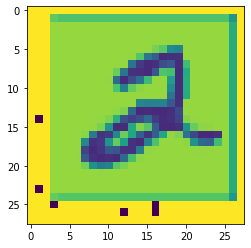

In [6]:
ML.add(keras.layers.Dense(units=50,activation='relu',input_shape=x_train.shape[1:]))
ML.add(keras.layers.Dense(units=100,activation='relu'))
ML.add(keras.layers.Dense(units=70,activation='relu'))
ML.add(keras.layers.Dense(units=10,activation='softmax'))
ML.summary()
ML.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ML.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_acc=ML.evaluate(x_test,y_test)
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img=load_img('a1.png',grayscale=True,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,28*28)
#img=img.reshape(28*28,1)
img=img.astype('float32')/255.0
digit=ML.predict(img)
print('digit is ',digit[0])